FINANCIAL ANALYZER
Created 178 transactions


C:\Users\rimsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



ANALYSIS RESULTS

BASIC STATISTICS:
- Total transactions: 178
- Total amount spent: ₹97,686.64
- Average per transaction: ₹548.80
- Average daily spending: ₹1085.41

KEY INSIGHTS:
- Total money spent: ₹97,686.64
- Average transaction: ₹548.80
- Transactions per day: 2.0
- Highest spending category: Large Bills & Shopping
- Amount spent on Large Bills & Shopping: ₹37,533.83
- Your spending is balanced between weekdays and weekends
- Largest unusual transaction: Electricity Bill - ₹1979.54

TOP UNUSUAL TRANSACTIONS:
- 2024-03-16: Electricity Bill - ₹1979.54
- 2024-02-02: Electricity Bill - ₹1974.91
- 2024-03-28: Internet Bill - ₹1880.92

RECOMMENDATIONS:
1. Your daily spending is high. Try tracking expenses daily.
2. Large purchases are your biggest expense. Consider if they're necessary.
3. Review your transactions weekly to stay on track
4. Set a monthly spending limit for each category


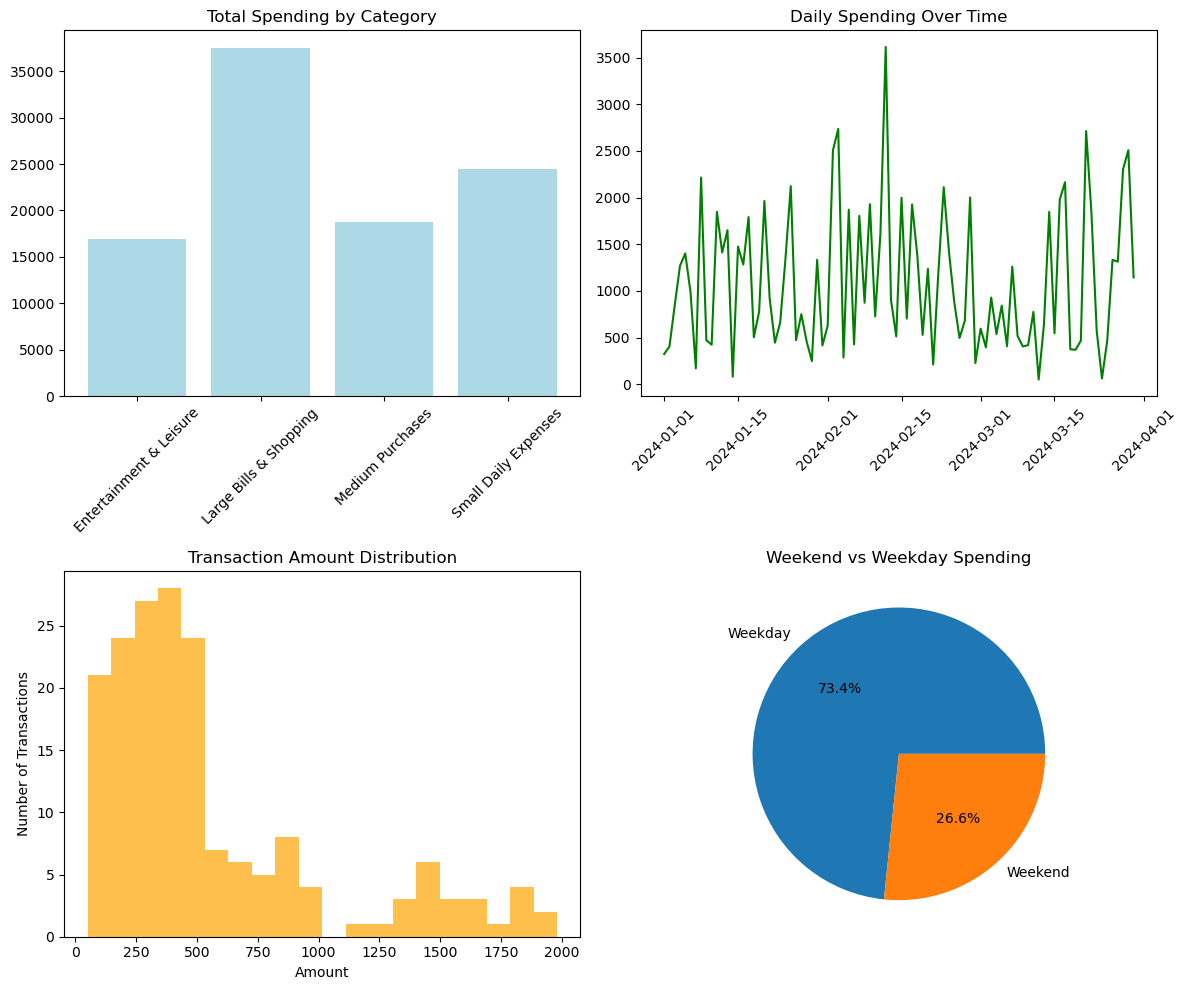

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

class FinancialAnalyzer:
    def __init__(self):
        self.scaler = StandardScaler()
        self.kmeans = KMeans(n_clusters=4, random_state=42)
    
    def generate_sample_data(self):
        dates = pd.date_range('2024-01-01', periods=90, freq='D')
        
        transactions = []
        descriptions = [
            "Groceries", "Restaurant", "Coffee Shop", "Online Shopping", 
            "Clothing Store", "Fuel Station", "Taxi Ride", "Movie Tickets",
            "Mobile Recharge", "Internet Bill", "Electricity Bill"
        ]
        
        for date in dates:
            num_transactions = np.random.randint(1, 4)
            
            for _ in range(num_transactions):
                description = np.random.choice(descriptions)
                
                if "Bill" in description:
                    amount = np.random.uniform(500, 2000)
                elif "Shopping" in description:
                    amount = np.random.uniform(200, 1000)
                else:
                    amount = np.random.uniform(50, 500)
                
                transactions.append({
                    'date': date,
                    'description': description,
                    'amount': round(amount, 2)
                })
        
        df = pd.DataFrame(transactions)
        print(f"Created {len(df)} transactions")
        return df
    
    def preprocess_data(self, df):
        df['date'] = pd.to_datetime(df['date'])
        df['day_of_week'] = df['date'].dt.day_name()
        df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])
        df['month'] = df['date'].dt.month
        
        df['amount_size'] = pd.cut(df['amount'], 
                                 bins=[0, 100, 500, 1000, np.inf],
                                 labels=['Small', 'Medium', 'Large', 'Very Large'])
        
        df['desc_length'] = df['description'].str.len()
        
        return df
    
    def categorize_transactions(self, df):
        features = df[['amount', 'desc_length']]
        scaled_features = self.scaler.fit_transform(features)
        df['cluster'] = self.kmeans.fit_predict(scaled_features)
        
        category_names = {
            0: "Small Daily Expenses",
            1: "Medium Purchases", 
            2: "Large Bills & Shopping",
            3: "Entertainment & Leisure"
        }
        
        df['category'] = df['cluster'].map(category_names)
        return df
    
    def detect_anomalies(self, df):
        mean_amount = df['amount'].mean()
        std_amount = df['amount'].std()
        df['is_anomaly'] = df['amount'] > (mean_amount + 2 * std_amount)
        return df
    
    def calculate_metrics(self, df):
        metrics = {}
        
        metrics['total_spent'] = df['amount'].sum()
        metrics['avg_transaction'] = df['amount'].mean()
        metrics['total_transactions'] = len(df)
        
        daily_spending = df.groupby('date')['amount'].sum()
        metrics['avg_daily_spend'] = daily_spending.mean()
        metrics['max_daily_spend'] = daily_spending.max()
        
        category_totals = df.groupby('category')['amount'].sum()
        metrics['top_category'] = category_totals.idxmax()
        metrics['top_category_amount'] = category_totals.max()
        
        weekend_spending = df[df['is_weekend']]['amount'].sum()
        metrics['weekend_ratio'] = weekend_spending / metrics['total_spent']
        
        return metrics
    
    def create_visualizations(self, df, metrics):
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
        
        category_spending = df.groupby('category')['amount'].sum()
        ax1.bar(category_spending.index, category_spending.values, color='lightblue')
        ax1.set_title('Total Spending by Category')
        ax1.tick_params(axis='x', rotation=45)
        
        daily_totals = df.groupby('date')['amount'].sum()
        ax2.plot(daily_totals.index, daily_totals.values, color='green')
        ax2.set_title('Daily Spending Over Time')
        ax2.tick_params(axis='x', rotation=45)
        
        ax3.hist(df['amount'], bins=20, color='orange', alpha=0.7)
        ax3.set_title('Transaction Amount Distribution')
        ax3.set_xlabel('Amount')
        ax3.set_ylabel('Number of Transactions')
        
        weekend_total = df[df['is_weekend']]['amount'].sum()
        weekday_total = df[~df['is_weekend']]['amount'].sum()
        ax4.pie([weekday_total, weekend_total], labels=['Weekday', 'Weekend'], autopct='%1.1f%%')
        ax4.set_title('Weekend vs Weekday Spending')
        
        plt.tight_layout()
        plt.show()
    
    def generate_insights(self, df, metrics):
        insights = []
        
        insights.append(f"Total money spent: ₹{metrics['total_spent']:,.2f}")
        insights.append(f"Average transaction: ₹{metrics['avg_transaction']:.2f}")
        insights.append(f"Transactions per day: {len(df)/90:.1f}")
        
        insights.append(f"Highest spending category: {metrics['top_category']}")
        insights.append(f"Amount spent on {metrics['top_category']}: ₹{metrics['top_category_amount']:,.2f}")
        
        if metrics['weekend_ratio'] > 0.4:
            insights.append("You spend more on weekends - consider budgeting weekend activities")
        else:
            insights.append("Your spending is balanced between weekdays and weekends")
        
        anomalies = df[df['is_anomaly']]
        if len(anomalies) > 0:
            largest_anomaly = anomalies.nlargest(1, 'amount').iloc[0]
            insights.append(f"Largest unusual transaction: {largest_anomaly['description']} - ₹{largest_anomaly['amount']:.2f}")
        
        return insights
    
    def generate_recommendations(self, df, metrics):
        recommendations = []
        
        if metrics['avg_daily_spend'] > 1000:
            recommendations.append("Your daily spending is high. Try tracking expenses daily.")
        
        if metrics['weekend_ratio'] > 0.5:
            recommendations.append("Over 50% of spending is on weekends. Plan weekend budgets.")
        
        if metrics['top_category'] == "Large Bills & Shopping":
            recommendations.append("Large purchases are your biggest expense. Consider if they're necessary.")
        elif metrics['top_category'] == "Small Daily Expenses":
            recommendations.append("Small daily expenses add up. Track them carefully.")
        
        recommendations.append("Review your transactions weekly to stay on track")
        recommendations.append("Set a monthly spending limit for each category")
        
        return recommendations
    
    def run_analysis(self):
        print("=" * 50)
        print("FINANCIAL ANALYZER")
        print("=" * 50)
        
        df = self.generate_sample_data()
        df_processed = self.preprocess_data(df)
        df_categorized = self.categorize_transactions(df_processed)
        df_analyzed = self.detect_anomalies(df_categorized)
        metrics = self.calculate_metrics(df_analyzed)
        insights = self.generate_insights(df_analyzed, metrics)
        recommendations = self.generate_recommendations(df_analyzed, metrics)
        
        print("\n" + "=" * 50)
        print("ANALYSIS RESULTS")
        print("=" * 50)
        
        print(f"\nBASIC STATISTICS:")
        print(f"- Total transactions: {metrics['total_transactions']}")
        print(f"- Total amount spent: ₹{metrics['total_spent']:,.2f}")
        print(f"- Average per transaction: ₹{metrics['avg_transaction']:.2f}")
        print(f"- Average daily spending: ₹{metrics['avg_daily_spend']:.2f}")
        
        print(f"\nKEY INSIGHTS:")
        for insight in insights:
            print(f"- {insight}")
        
        print(f"\nTOP UNUSUAL TRANSACTIONS:")
        anomalies = df_analyzed[df_analyzed['is_anomaly']].nlargest(3, 'amount')
        if len(anomalies) > 0:
            for _, transaction in anomalies.iterrows():
                print(f"- {transaction['date'].date()}: {transaction['description']} - ₹{transaction['amount']:.2f}")
        else:
            print("- No unusual transactions found")
        
        print(f"\nRECOMMENDATIONS:")
        for i, recommendation in enumerate(recommendations, 1):
            print(f"{i}. {recommendation}")
        
        self.create_visualizations(df_analyzed, metrics)
    
        
        return df_analyzed, metrics

def main():
    analyzer = FinancialAnalyzer()
    results = analyzer.run_analysis()

if __name__ == "__main__":
    main()